In [69]:
import pandas as pd
import numpy as np

In [183]:
Cardata=pd.read_csv("CarPriceData.csv")

**EDA Part**


In [184]:
Cardata.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [185]:
Cardata.shape

(301, 9)

In [186]:
Cardata.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [187]:
Cardata.describe(include='O')

,Car_Name,Fuel_Type,Seller_Type,Transmission
count,301,301,301,301
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,195,261


In [188]:
Cardata.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [189]:
Cardata["PrstYr"]=2020

In [190]:
Cardata.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,PrstYr
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [191]:
Cardata["YrDiff"]=Cardata['PrstYr']-Cardata['Year']

In [192]:
Cardata.head(4)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,PrstYr,YrDiff
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9


In [193]:
Cardata=Cardata.drop(['Year','PrstYr','Car_Name'],1)

In [194]:
Cardata.head(3)

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,YrDiff
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3


In [195]:
Cardata.dtypes

Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
YrDiff             int64
dtype: object

In [196]:
Cardata=pd.get_dummies(Cardata,columns=['Fuel_Type','Seller_Type','Transmission'],drop_first=True)

In [197]:
Cardata.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,YrDiff,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [198]:
Cardata.Fuel_Type_Diesel.value_counts()

0    241
1     60
Name: Fuel_Type_Diesel, dtype: int64

In [199]:
Cardata.head(3)

,Selling_Price,Present_Price,Kms_Driven,Owner,YrDiff,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1


In [200]:
import seaborn
import matplotlib.pyplot as plt

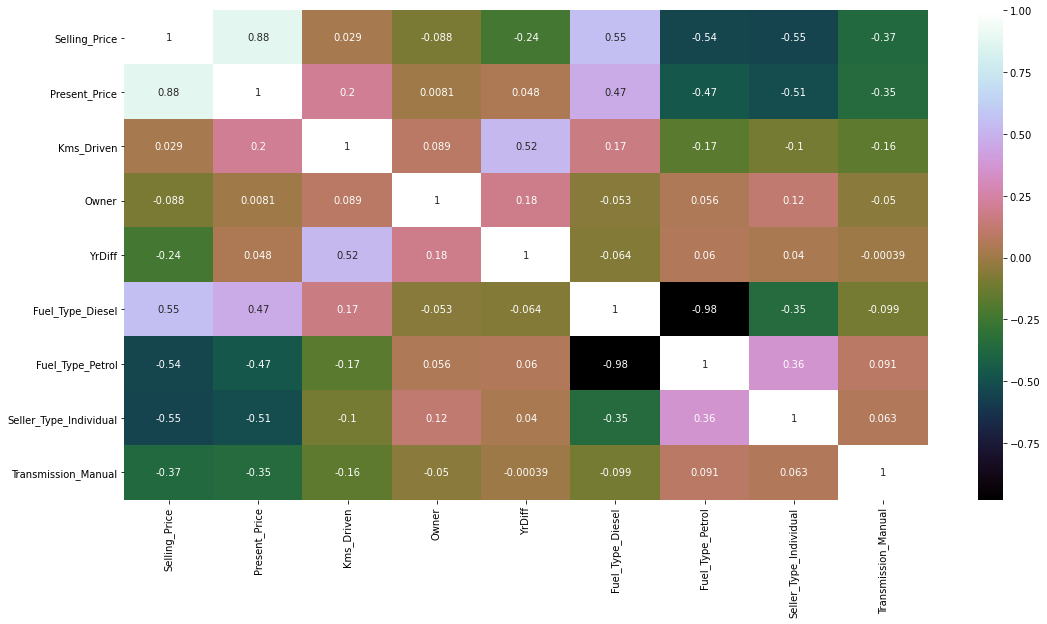

In [201]:
plt.figure(figsize=(18,9))
corr =Cardata.corr()
seaborn.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,cmap='cubehelix',annot=True)
plt.show()

**Observations**
- whenever Present Price increases ,the selling price also increase as seen from the correlation value as 0.88
- Kms Driven almost constant with Selling price i.e neutral 
- As the owners counts increases the selling price decrease i.e negative correlation
- Same with the case for YrDiff as observed like Owners
- if the car's fuel type is diesel,the selling price increases,if the car's fuel type is petrol,the selling price decreases
- if the car's Seller type is Indivual,the selling price decreases,if it is delear he will increase the selling price
- if the car's Transmissoion is manual,the selling price decreases,if it is automatic it will increase the selling price
- Also we can drop either of Diesel or petrol since correlation is high

In [202]:
#Cardata=Cardata.drop(['Fuel_Type_Diesel'],1)

In [203]:
Cardata1=Cardata

In [204]:
Cardata1.head(2)

,Selling_Price,Present_Price,Kms_Driven,Owner,YrDiff,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1


In [205]:
Y=Cardata1[['Selling_Price']]

In [206]:
X=Cardata1.drop(['Selling_Price'],axis=1)

In [207]:
Y.head(2)

,Selling_Price
0,3.35
1,4.75


In [208]:
X.head(2)

,Present_Price,Kms_Driven,Owner,YrDiff,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1


In [209]:
import sklearn
from sklearn.ensemble import ExtraTreesRegressor

In [210]:
model=ExtraTreesRegressor()

In [211]:
model.fit(X,Y)

c:\users\adity\anaconda3\envs\carprediction\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


ExtraTreesRegressor()

In [212]:
model.feature_importances_

array([0.37320568, 0.04171494, 0.0005126 , 0.07542655, 0.23147136,
       0.00868794, 0.12601272, 0.14296821])

In [213]:
Assignorder=pd.DataFrame(pd.Series(model.feature_importances_,index=X.columns))

In [214]:
Assignorder=Assignorder.rename(columns={0:"Imp_value"})

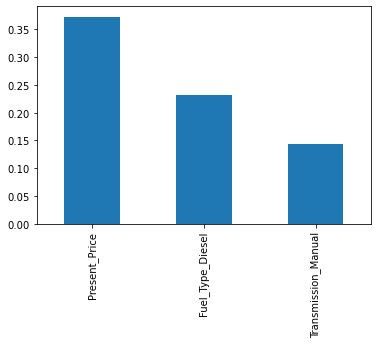

In [215]:
Assignorder['Imp_value'].nlargest(3).plot(kind='bar')
plt.show()

In [216]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=30)

In [217]:
Y_test

,Selling_Price
63,23.50
120,1.05
130,0.75
61,4.50
110,1.20
...,...
123,1.00
112,1.15
247,5.95
106,1.35


#### Hyperparameters Tunning

In [218]:
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]

In [219]:
#The minimum number of samples required to split an internal node:

In [220]:
max_depth=[int(x) for x in np.linspace(5,30,num=6)]

In [221]:
max_features=["auto","sqrt"]

In [222]:
min_samples_split=[2,5,10,15,100]

In [223]:
min_samples_leaf=[1,2,5,10]

In [224]:
from sklearn.model_selection import RandomizedSearchCV

In [225]:
random_grid={'n_estimators':n_estimators,
             'max_depth':max_depth,
             'max_features':max_features,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_depth': [5, 10, 15, 20, 25, 30], 'max_features': ['auto', 'sqrt'], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [226]:
from sklearn.ensemble import RandomForestRegressor
mod=RandomForestRegressor()

In [227]:
rf_random=RandomizedSearchCV(estimator=mod,param_distributions=random_grid,scoring='neg_mean_squared_error',cv=5,verbose=2,random_state=30,n_jobs=1)

In [228]:
rf_random.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=20 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\users\adity\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=20, total=   0.7s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=20 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
c:\users\adity\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=20, total=   0.7s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=20 


c:\users\adity\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=20, total=   0.7s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=20 


c:\users\adity\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=20, total=   0.7s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=20 


c:\users\adity\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=20, total=   0.7s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=5 


c:\users\adity\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.2s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=5 


c:\users\adity\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.2s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=5 


c:\users\adity\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.2s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=5 


c:\users\adity\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.2s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=5 


c:\users\adity\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 


c:\users\adity\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=   1.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 


c:\users\adity\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=   1.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 


c:\users\adity\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=   1.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 


c:\users\adity\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=   1.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 


c:\users\adity\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=   1.1s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=15 
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=15, total=   0.1s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=15 


c:\users\adity\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\adity\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=15, total=   0.1s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=15 
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=15, total=   0.1s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=15 


c:\users\adity\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\adity\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=15, total=   0.1s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=15 
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=15, total=   0.1s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=10 


c:\users\adity\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\adity\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   0.8s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=10 


c:\users\adity\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   0.9s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=10 


c:\users\adity\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   1.0s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=10 


c:\users\adity\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   0.8s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=10 


c:\users\adity\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   1.0s
[CV] n_estimators=1100, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=10 


c:\users\adity\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1100, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.2s
[CV] n_estimators=1100, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=10 


c:\users\adity\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1100, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.2s
[CV] n_estimators=1100, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=10 


c:\users\adity\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1100, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.2s
[CV] n_estimators=1100, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=10 


c:\users\adity\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1100, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.3s
[CV] n_estimators=1100, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=10 


c:\users\adity\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1100, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.3s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=20 


c:\users\adity\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=20, total=   1.1s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=20 


c:\users\adity\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=20, total=   1.2s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=20 


c:\users\adity\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=20, total=   1.1s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=20 


c:\users\adity\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=20, total=   1.1s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=20 


c:\users\adity\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=20, total=   1.1s
[CV] n_estimators=800, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=10 


c:\users\adity\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=800, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   0.9s
[CV] n_estimators=800, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=10 


c:\users\adity\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=800, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   0.9s
[CV] n_estimators=800, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=10 


c:\users\adity\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=800, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   0.9s
[CV] n_estimators=800, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=10 


c:\users\adity\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=800, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   0.9s
[CV] n_estimators=800, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=10 


c:\users\adity\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=800, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   0.9s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=15 


c:\users\adity\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=15, total=   0.7s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=15 


c:\users\adity\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=15, total=   0.7s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=15 


c:\users\adity\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=15, total=   0.7s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=15 


c:\users\adity\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=15, total=   0.7s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=15 


c:\users\adity\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=15, total=   0.7s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=15 


c:\users\adity\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=15, total=   0.4s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=15 


c:\users\adity\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=15, total=   0.4s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=15 


c:\users\adity\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=15, total=   0.5s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=15 


c:\users\adity\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=15, total=   0.5s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=15 


c:\users\adity\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=15, total=   0.5s


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   36.8s finished
c:\users\adity\anaconda3\envs\carprediction\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=30, scoring='neg_mean_squared_error',
                   verbose=2)

In [229]:
predictions=rf_random.predict(X_test)

In [230]:
predictions

array([19.68877152,  0.88571297,  0.64076922,  5.38050659,  1.14992221,
       20.11299222,  0.40267277,  2.72021069,  9.5698524 ,  0.23269207,
        5.14132731,  0.20354399,  4.20685263,  5.7187636 ,  5.02605412,
        3.77569463,  3.3901246 ,  6.27829549,  0.30770746,  0.23591417,
        5.73220106,  0.19633209,  0.30622147,  0.37938609,  4.88107101,
       13.06872651,  0.44352438,  0.30442762,  0.51966836,  6.25094923,
        4.30324888,  2.82416301,  7.55240651, 10.9460523 , 19.60295424,
        7.81432983,  2.76980837,  9.79685796,  0.43202103,  1.41313705,
        5.75414032,  0.44040973,  4.17584199,  6.74682908,  7.31202914,
        6.10690229,  0.53912707,  0.30810095, 10.73316844, 10.29398095,
        0.36019994, 18.15511553,  0.51996233,  0.70932762, 19.60295424,
        1.47228168,  4.39189672,  3.71359166, 15.35948516,  5.78183378,
        0.74449559,  0.23432741, 11.21718013,  7.40820959,  3.57120796,
        1.13391831,  4.2066528 ,  8.92577988,  9.55865046,  4.50

In [231]:
Y_test1=Y_test.values

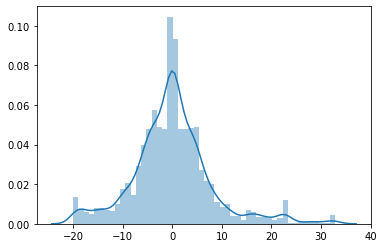

In [232]:
seaborn.distplot(Y_test1-predictions)

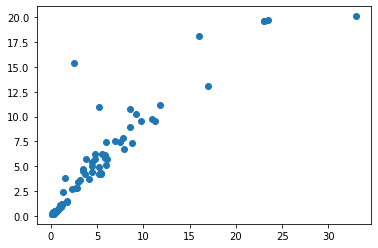

In [233]:
plt.scatter(Y_test1,predictions)

In [238]:
import pickle
file=open('random_forest.pkl','wb')
pickle.dump(rf_random,file)

In [239]:
X_train.head(2)

,Present_Price,Kms_Driven,Owner,YrDiff,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
272,10.0,27600,0,5,0,1,0,1
92,13.7,75000,0,15,0,1,0,1
